# Plotting examples
*written by Jin Hyun Cheong*

Included in the toolbox are two models for Action Units to landmark visualization. The 'pyfeat_aus_to_landmarks.h5' model was created by using landmarks extracted using Py-FEAT to align each face in the dataset to a neutral face with numpy's least squares function. Then the PLS model was trained using Action Unit labels to predict transformed landmark data. 

Draw a standard neutral face. Figsize can be altered but a ratio of 4:5 is recommended. 

<AxesSubplot:>

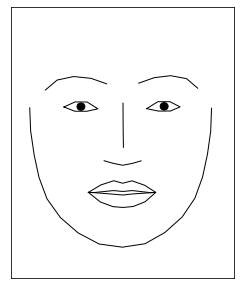

In [1]:
# Load modules
%matplotlib inline
from feat.plotting import plot_face
import numpy as np
import matplotlib.pyplot as plt

plot_face(au=np.zeros(20))

## Draw lineface using input vector

Affectiva vectors should be divided by twenty for use with our 'blue' model. 

<AxesSubplot:>

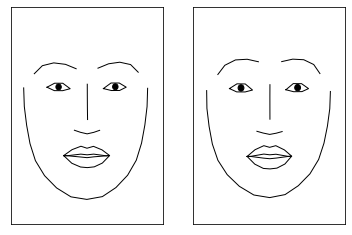

In [42]:
from feat.plotting import plot_face
import numpy as np
import matplotlib.pyplot as plt

# Add data, AU is ordered as such: 
# AU1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 18, 20, 23, 24, 25, 26, 28, 43

# Activate AU1: Inner brow raiser 
au = [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plot face
fig, axes = plt.subplots(1,2)
plot_face(model=None, ax = axes[0], au = np.zeros(20), color='k', linewidth=1, linestyle='-')
plot_face(model=None, ax = axes[1], au = np.array(au), color='k', linewidth=1, linestyle='-')

## Add a vectorfield with arrows from the changed face back to neutral and vice versa 

<AxesSubplot:>

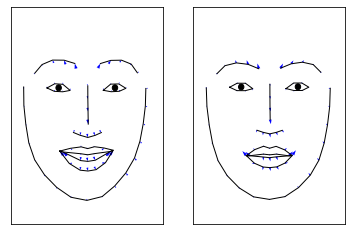

In [10]:
from feat.plotting import plot_face, predict
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

model = load_h5('pyfeat_aus_to_landmarks.h5')
# Add data activate AU1, and AU12
au = np.array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ])

# Get neutral landmarks
neutral = predict(np.zeros(len(au)))

# Provide target landmarks and other vector specifications
vectors = {'target': predict(au),
           'reference':  neutral, 'color': 'blue'}

fig, axes = plt.subplots(1,2)
# Plot face where vectorfield goes from neutral to target, with target as final face
plot_face(model = model, ax = axes[0], au = np.array(au), 
            vectorfield = vectors, color='k', linewidth=1, linestyle='-')

# Plot face where vectorfield goes from neutral to target, with neutral as base face
plot_face(model = model, ax = axes[1], au = np.zeros(len(au)), 
            vectorfield = vectors, color='k', linewidth=1, linestyle='-')

## Add muscle heatmaps to the plot

<AxesSubplot:>

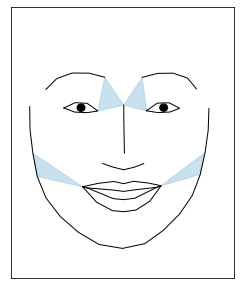

In [11]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
model = load_h5()

au = np.array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Add some muscles
muscles = {'orb_oris_l': 'yellow', 'orb_oris_u': "blue"}
muscles = {'all': 'heatmap'}

plot_face(model=model, au = np.array(au), 
          muscles = muscles, color='k', linewidth=1, linestyle='-')

<AxesSubplot:>

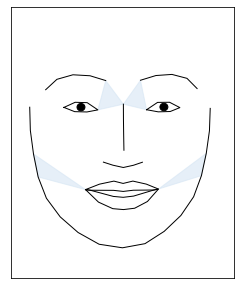

In [12]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]
au = np.array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Add some muscles
muscles = {'all': 'heatmap'}

# Plot face
plot_face(model=None, au = np.array(au), muscles = muscles, color='k', linewidth=1, linestyle='-')

## Make sure muscle array contains 'facet' for a facet heatmap

<AxesSubplot:>

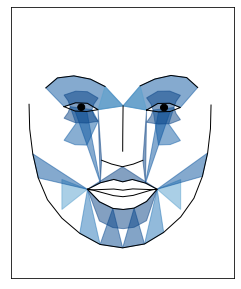

In [13]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = np.array([0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0])

# Load a model 
model = load_h5()

# Add muscles
muscles = {'all': 'heatmap', 'facet': 1}

# Plot face
plot_face(model=model, au = au, muscles = muscles, color='k', linewidth=1, linestyle='-')

## Add gaze vectors
Add gaze vectors to indicate where the eyes are looking.   
Gaze vectors are length 4 (lefteye_x, lefteye_y, righteye_x, righteye_y) where the y orientation is positive for looking upwards.

<AxesSubplot:>

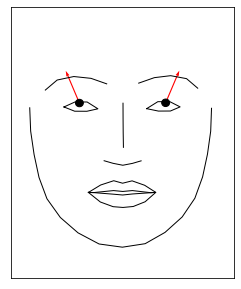

In [14]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = np.zeros(20)

# Add some gaze vectors: (lefteye_x, lefteye_y, righteye_x, righteye_y)
gaze = [-1, 5, 1, 5]

# Plot face
plot_face(model=None, au = au, gaze = gaze, color='k', linewidth=1, linestyle='-')

## Call plot method on Fex instances
It is possible to call the `plot_aus` method within openface, facet, affdex fex instances

OpenFace

<AxesSubplot:>

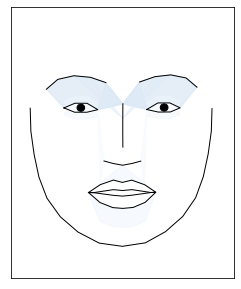

In [20]:
from feat.plotting import plot_face
import numpy as np
import matplotlib.pyplot as plt
from feat.utils import  load_h5, get_resource_path, read_openface
from feat.tests.utils import get_test_data_path
from os.path import join

test_file = join(get_test_data_path(),'OpenFace_Test.csv')
openface = read_openface(test_file)
openface.plot_aus(12, muscles={'all': "heatmap"}, gaze = None)